In [1]:
#Load the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
from collections import Counter 

In [2]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [5]:


trace0 = go.Bar(
            x = df[df["DEATH_EVENT"]== 0]["DEATH_EVENT"].value_counts().index.values,
            y = df[df["DEATH_EVENT"]== 0]["DEATH_EVENT"].value_counts().values,
            name='Death Event 0'
    )

trace1 = go.Bar(
            x = df[df["DEATH_EVENT"]== 1]["DEATH_EVENT"].value_counts().index.values,
            y = df[df["DEATH_EVENT"]== 1]["DEATH_EVENT"].value_counts().values,
            name='Death Event 1'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='DEATH_EVENTDEATH_EVENT Variable'
    ),
    title='DEATH_EVENT variable distribution(Target value)'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [6]:
df_good = df.loc[df["DEATH_EVENT"] == 0]['age'].values.tolist()
df_bad = df.loc[df["DEATH_EVENT"] == 1]['age'].values.tolist()
df_age = df['age'].values.tolist()


fig1_1= go.Histogram(x=df_good,histnorm='percent',name="DEATH_EVENT 0/low probability")

fig1_2= go.Histogram(x=df_bad, histnorm='percent',name="DEATH_EVENT 1/high probability",autobinx=False)

fig1_3= go.Histogram(x=df_age,histnorm='percent',name="Overall age")

fig = tls.make_subplots(rows=2, cols=2,subplot_titles=('DEATH_EVENT 0/low probability','DEATH_EVENT 1/high probability', 'General Distribuition'))


fig.append_trace(fig1_1, 1, 1)
fig.append_trace(fig1_2, 1, 2)
fig.append_trace(fig1_3, 2, 1)

fig['layout'].update(showlegend=True, title='age Distribuition', bargap=0.05)
py.iplot(fig, filename='A1')

C:\Users\ajink\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



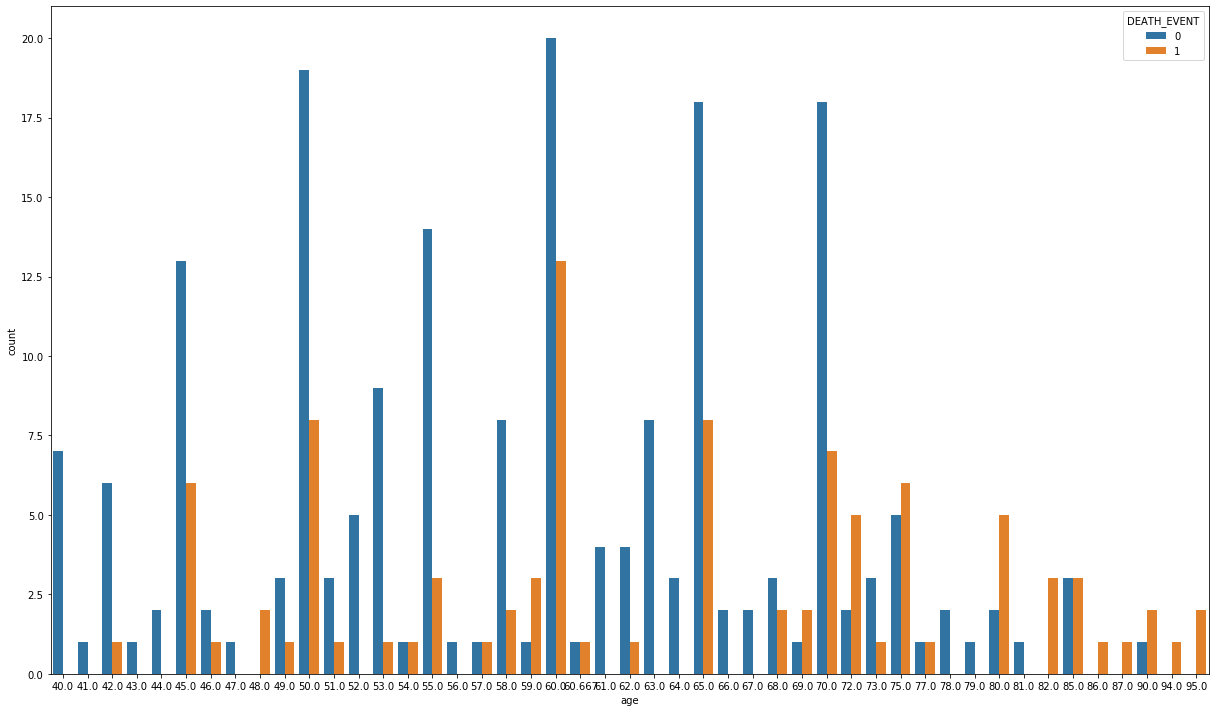

In [7]:
df_good = df[df["DEATH_EVENT"] == 1]
df_bad = df[df["DEATH_EVENT"] == 0]


fig, ax = plt.subplots(figsize=(17,10))
ax = sns.countplot(x="age", hue="DEATH_EVENT", data=df)
fig.tight_layout()

# Risk of death by gender (0=Female, 1=Male)

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

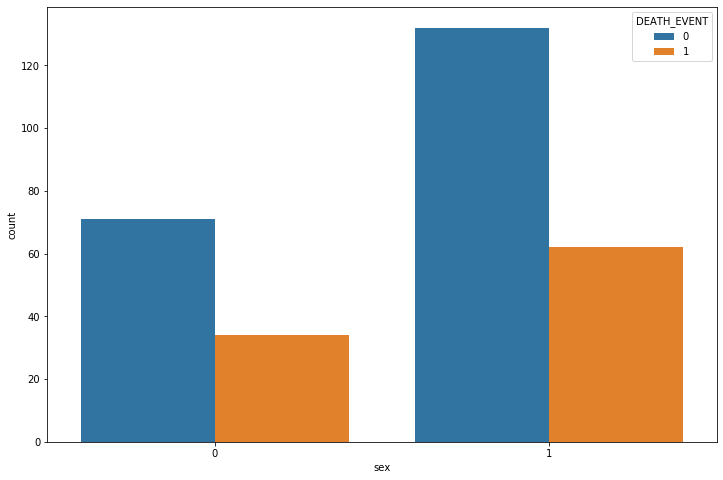

In [8]:
df_good = df[df["DEATH_EVENT"] == 0]
df_bad = df[df["DEATH_EVENT"] == 1]


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="sex", hue="DEATH_EVENT", data=df)
fig.tight_layout

# Risk of death due by Anemia (0=No Anemia, 1=Anemia)

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

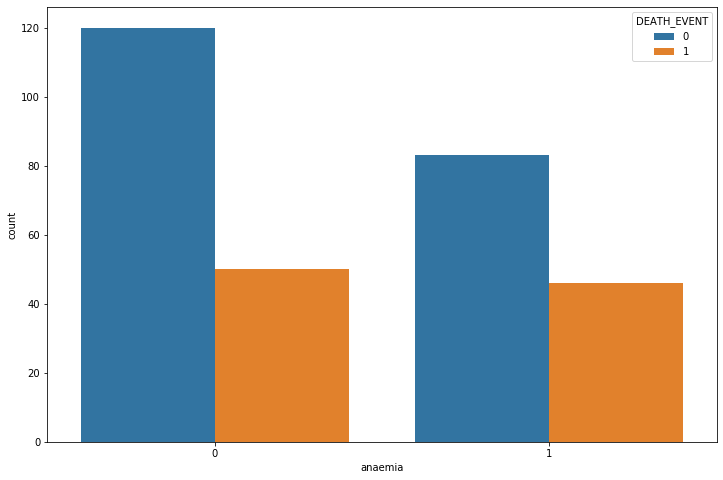

In [9]:
df_good = df[df["DEATH_EVENT"] == 0]
df_bad = df[df["DEATH_EVENT"] == 1]


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="anaemia", hue="DEATH_EVENT", data=df)
fig.tight_layout

# Risk of death due by diabetes (0=No diabetes, 1=diabetes)

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

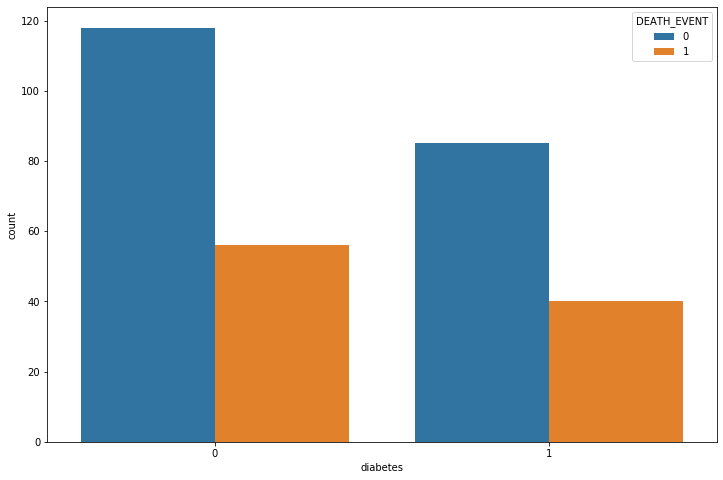

In [10]:
df_good = df[df["DEATH_EVENT"] == 0]
df_bad = df[df["DEATH_EVENT"] == 1]


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="diabetes", hue="DEATH_EVENT", data=df)
fig.tight_layout

# Risk of death due by high blood pressure  (0=No high blood pressure, 1=high blood pressure)

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

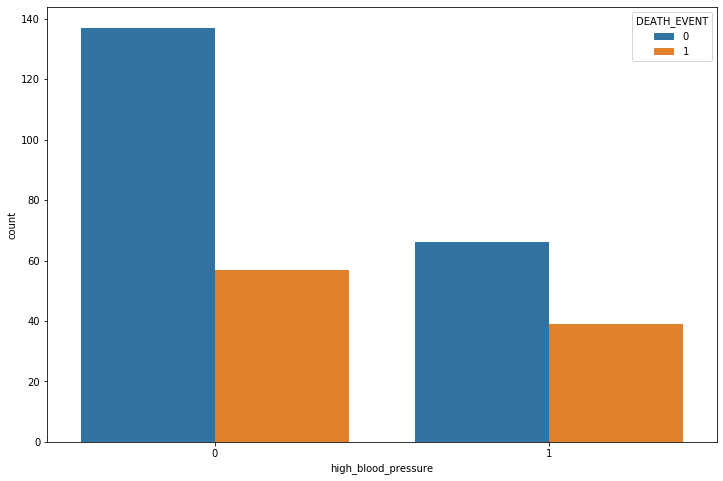

In [11]:
df_good = df[df["DEATH_EVENT"] == 0]
df_bad = df[df["DEATH_EVENT"] == 1]


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=df)
fig.tight_layout

# Risk of death due by smoking  (0=Non smoker, 1=smoker)

<bound method Figure.tight_layout of <Figure size 864x576 with 1 Axes>>

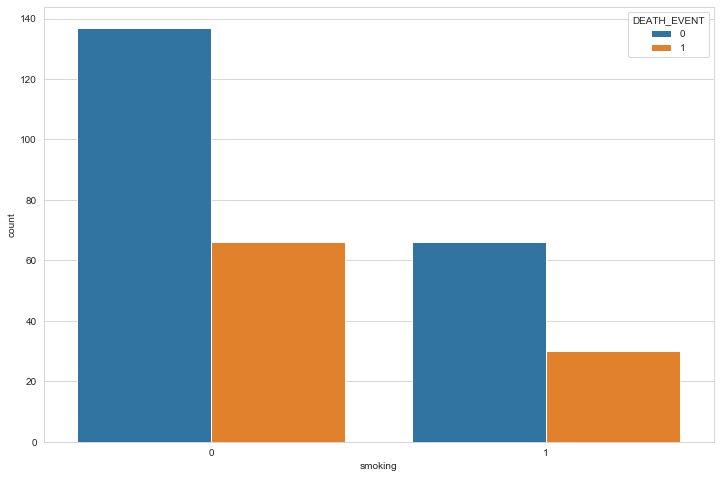

In [15]:
df_good = df[df["DEATH_EVENT"] == 0]
df_bad = df[df["DEATH_EVENT"] == 1]


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="smoking", hue="DEATH_EVENT", data=df)
fig.tight_layout

# Age distribution of the dataset 

Text(0.5, 0, 'Age')

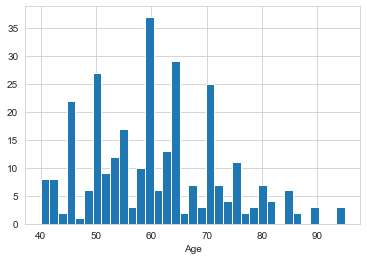

In [14]:
sns.set_style('whitegrid')

df['age'].hist(bins=35)

plt.xlabel('Age')

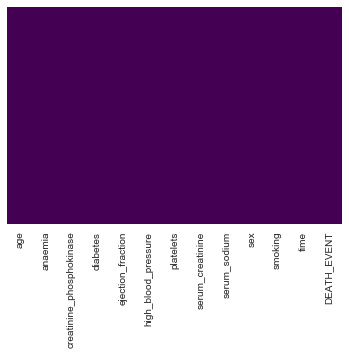

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# we have no blanks or nulls in the dataset; too good to be true 

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# We are doing one hot encoding on the binary features, not required every time but it is a good practice 

In [23]:
anaemia1 = pd.get_dummies(df['anaemia'],drop_first=True)
diabetes1 = pd.get_dummies(df['diabetes'],drop_first=True)
high_blood_pressure1 = pd.get_dummies(df['high_blood_pressure'],drop_first=True)
sex1 = pd.get_dummies(df['sex'],drop_first=True)
smoking1 = pd.get_dummies(df['smoking'],drop_first=True)

In [24]:
df.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex','smoking'],axis=1,inplace=True)

In [26]:
df = pd.concat([df,anaemia1,diabetes1,high_blood_pressure1,sex1,smoking1],axis=1)

In [27]:
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,1,1,1,1,1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0


# Using a simple logistic model 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEATH_EVENT',axis=1), 
                                                    df['DEATH_EVENT'], test_size=0.33, 
                                                    random_state=120)

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions = lr.predict(X_test)

In [36]:
predictions

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Not bad for starters 

In [38]:
print(classification_report(y_test,predictions))
print('Accuracy score:', accuracy_score(y_test,predictions))
print('\n confusion_matrix:', confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        67
           1       0.80      0.75      0.77        32

    accuracy                           0.86        99
   macro avg       0.84      0.83      0.84        99
weighted avg       0.86      0.86      0.86        99

Accuracy score: 0.8585858585858586

 confusion_matrix: [[61  6]
 [ 8 24]]


# Grid search is done to get the best parameters for the current model 

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [52]:
param_grid = {'C': [0.7,0.9,1,10,100,1000], 'max_iter': [50,100,105,110,120,1000]}

In [53]:
grid = GridSearchCV(lr,param_grid,verbose=3)

In [54]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.7, max_iter=50 ..............................................
[CV] .................. C=0.7, max_iter=50, score=0.825, total=   0.0s
[CV] C=0.7, max_iter=50 ..............................................
[CV] .................. C=0.7, max_iter=50, score=0.775, total=   0.0s
[CV] C=0.7, max_iter=50 ..............................................
[CV] .................. C=0.7, max_iter=50, score=0.825, total=   0.0s
[CV] C=0.7, max_iter=50 ..............................................
[CV] .................. C=0.7, max_iter=50, score=0.700, total=   0.0s
[CV] C=0.7, max_iter=50 ..............................................
[CV] .................. C=0.7, max_iter=50, score=0.800, total=   0.0s
[CV] C=0.7, max_iter=100 .............................................
[CV] ................. C=0.7, max_iter=100, score=0.775, total=   0.0s
[CV] C=0.7, max_iter=100 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

[CV] ................. C=0.7, max_iter=105, score=0.800, total=   0.0s
[CV] C=0.7, max_iter=110 .............................................
[CV] ................. C=0.7, max_iter=110, score=0.775, total=   0.0s
[CV] C=0.7, max_iter=110 .............................................
[CV] ................. C=0.7, max_iter=110, score=0.775, total=   0.0s
[CV] C=0.7, max_iter=110 .............................................
[CV] ................. C=0.7, max_iter=110, score=0.800, total=   0.0s
[CV] C=0.7, max_iter=110 .............................................
[CV] ................. C=0.7, max_iter=110, score=0.725, total=   0.0s
[CV] C=0.7, max_iter=110 .............................................
[CV] ................. C=0.7, max_iter=110, score=0.800, total=   0.0s
[CV] C=0.7, max_iter=120 .............................................
[CV] ................. C=0.7, max_iter=120, score=0.775, total=   0.0s
[CV] C=0.7, max_iter=120 .............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages

[CV] ................ C=0.7, max_iter=1000, score=0.725, total=   0.0s
[CV] C=0.7, max_iter=1000 ............................................
[CV] ................ C=0.7, max_iter=1000, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=50 ..............................................
[CV] .................. C=0.9, max_iter=50, score=0.825, total=   0.0s
[CV] C=0.9, max_iter=50 ..............................................
[CV] .................. C=0.9, max_iter=50, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=50 ..............................................
[CV] .................. C=0.9, max_iter=50, score=0.825, total=   0.0s
[CV] C=0.9, max_iter=50 ..............................................
[CV] .................. C=0.9, max_iter=50, score=0.700, total=   0.0s
[CV] C=0.9, max_iter=50 ..............................................
[CV] .................. C=0.9, max_iter=50, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=100 .............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages


[CV] C=0.9, max_iter=105 .............................................
[CV] ................. C=0.9, max_iter=105, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=110 .............................................
[CV] ................. C=0.9, max_iter=110, score=0.775, total=   0.0s
[CV] C=0.9, max_iter=110 .............................................
[CV] ................. C=0.9, max_iter=110, score=0.825, total=   0.0s
[CV] C=0.9, max_iter=110 .............................................
[CV] ................. C=0.9, max_iter=110, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=110 .............................................
[CV] ................. C=0.9, max_iter=110, score=0.725, total=   0.0s
[CV] C=0.9, max_iter=110 .............................................
[CV] ................. C=0.9, max_iter=110, score=0.800, total=   0.0s
[CV] C=0.9, max_iter=120 .............................................
[CV] ................. C=0.9, max_iter=120, score=0.775, total=   0.0s
[CV] 

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages

[CV] ................... C=1, max_iter=110, score=0.775, total=   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ................... C=1, max_iter=110, score=0.825, total=   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ................... C=1, max_iter=110, score=0.800, total=   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ................... C=1, max_iter=110, score=0.725, total=   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ................... C=1, max_iter=110, score=0.800, total=   0.0s
[CV] C=1, max_iter=120 ...............................................
[CV] ................... C=1, max_iter=120, score=0.775, total=   0.0s
[CV] C=1, max_iter=120 ...............................................
[CV] ................... C=1, max_iter=120, score=0.825, total=   0.0s
[CV] C=1, max_iter=120 ...............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages

[CV] ................... C=10, max_iter=50, score=0.750, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.825, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.700, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.800, total=   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.775, total=   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.825, total=   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.800, total=   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages

[CV] .................. C=100, max_iter=50, score=0.750, total=   0.0s
[CV] C=100, max_iter=50 ..............................................
[CV] .................. C=100, max_iter=50, score=0.825, total=   0.0s
[CV] C=100, max_iter=50 ..............................................
[CV] .................. C=100, max_iter=50, score=0.700, total=   0.0s
[CV] C=100, max_iter=50 ..............................................
[CV] .................. C=100, max_iter=50, score=0.800, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] ................. C=100, max_iter=100, score=0.775, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] ................. C=100, max_iter=100, score=0.825, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] ................. C=100, max_iter=100, score=0.800, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages


[CV] C=100, max_iter=110 .............................................
[CV] ................. C=100, max_iter=110, score=0.825, total=   0.0s
[CV] C=100, max_iter=110 .............................................
[CV] ................. C=100, max_iter=110, score=0.800, total=   0.0s
[CV] C=100, max_iter=110 .............................................
[CV] ................. C=100, max_iter=110, score=0.725, total=   0.0s
[CV] C=100, max_iter=110 .............................................
[CV] ................. C=100, max_iter=110, score=0.800, total=   0.0s
[CV] C=100, max_iter=120 .............................................
[CV] ................. C=100, max_iter=120, score=0.775, total=   0.0s
[CV] C=100, max_iter=120 .............................................
[CV] ................. C=100, max_iter=120, score=0.825, total=   0.0s
[CV] C=100, max_iter=120 .............................................
[CV] ................. C=100, max_iter=120, score=0.800, total=   0.0s
[CV] 

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ................ C=100, max_iter=1000, score=0.700, total=   0.0s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.800, total=   0.0s
[CV] C=1000, max_iter=50 .............................................
[CV] ................. C=1000, max_iter=50, score=0.825, total=   0.0s
[CV] C=1000, max_iter=50 .............................................
[CV] ................. C=1000, max_iter=50, score=0.750, total=   0.0s
[CV] C=1000, max_iter=50 .............................................
[CV] ................. C=1000, max_iter=50, score=0.825, total=   0.0s
[CV] C=1000, max_iter=50 .............................................
[CV] ................. C=1000, max_iter=50, score=0.700, total=   0.0s
[CV] C=1000, max_iter=50 .............................................
[CV] ................. C=1000, max_iter=50, score=0.800, total=   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages

[CV] ................ C=1000, max_iter=105, score=0.725, total=   0.0s
[CV] C=1000, max_iter=105 ............................................
[CV] ................ C=1000, max_iter=105, score=0.800, total=   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................ C=1000, max_iter=110, score=0.775, total=   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................ C=1000, max_iter=110, score=0.825, total=   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................ C=1000, max_iter=110, score=0.800, total=   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................ C=1000, max_iter=110, score=0.725, total=   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................ C=1000, max_iter=110, score=0.800, total=   0.0s
[CV] C=1000, max_iter=120 ............................................
[CV] .

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done 180 out of 180 

[CV] ............... C=1000, max_iter=1000, score=0.800, total=   0.0s
[CV] C=1000, max_iter=1000 ...........................................
[CV] ............... C=1000, max_iter=1000, score=0.700, total=   0.0s
[CV] C=1000, max_iter=1000 ...........................................
[CV] ............... C=1000, max_iter=1000, score=0.800, total=   0.0s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.7, 0.9, 1, 10, 100, 1000],
                         'max_iter': [50, 100, 105, 110, 120, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [55]:
grid.best_params_

{'C': 1, 'max_iter': 50}

In [56]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
grid_predictions = grid.predict(X_test)

In [58]:
print(confusion_matrix(y_test,grid_predictions))

[[63  4]
 [ 8 24]]


In [59]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        67
           1       0.86      0.75      0.80        32

    accuracy                           0.88        99
   macro avg       0.87      0.85      0.86        99
weighted avg       0.88      0.88      0.88        99



# Slightly better results but isn't that the goal every time ;) 

Thank you :) 